In [10]:
import pandas as pd

In [11]:
df = pd.read_csv("../data/students.csv")
df

,Name,Math,Science,English
0,Alice,78.0,83.0,89.0
1,Bob,NaN,72.0,70.0
2,Charlie,90.0,NaN,88.0
3,Diana,55.0,60.0,NaN


In [12]:
df.head()

,Name,Math,Science,English
0,Alice,78.0,83.0,89.0
1,Bob,NaN,72.0,70.0
2,Charlie,90.0,NaN,88.0
3,Diana,55.0,60.0,NaN


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Name     4 non-null      object 
 1   Math     3 non-null      float64
 2   Science  3 non-null      float64
 3   English  3 non-null      float64
dtypes: float64(3), object(1)
memory usage: 256.0+ bytes


In [14]:
df.describe()

,Math,Science,English
count,3.000000,3.000000,3.000000
mean,74.333333,71.666667,82.333333
std,17.785762,11.503623,10.692677
min,55.000000,60.000000,70.000000
25%,66.500000,66.000000,79.000000
50%,78.000000,72.000000,88.000000
75%,84.000000,77.500000,88.500000
max,90.000000,83.000000,89.000000


In [16]:
df.fillna(50,inplace=True)

In [17]:
df

,Name,Math,Science,English
0,Alice,78.0,83.0,89.0
1,Bob,50.0,72.0,70.0
2,Charlie,90.0,50.0,88.0
3,Diana,55.0,60.0,50.0


In [22]:
df["Total"]= df.apply(lambda row: row["Math"] + row["Science"]+ row["English"], axis = 1)

In [23]:
df

,Name,Math,Science,English,Total
0,Alice,78.0,83.0,89.0,250.0
1,Bob,50.0,72.0,70.0,192.0
2,Charlie,90.0,50.0,88.0,228.0
3,Diana,55.0,60.0,50.0,165.0


In [25]:
def result(total):
    if total > 180:
        return "Pass"
    else:
        return "Fail"    
df["Result"] = df["Total"].apply(result)

In [26]:
df

,Name,Math,Science,English,Total,Result
0,Alice,78.0,83.0,89.0,250.0,Pass
1,Bob,50.0,72.0,70.0,192.0,Pass
2,Charlie,90.0,50.0,88.0,228.0,Pass
3,Diana,55.0,60.0,50.0,165.0,Fail


In [ ]:
df.sort_values(["Total","Math","Science",""], axis=0,ascending=False,inplace =True)

In [28]:
df

,Name,Math,Science,English,Total,Result
0,Alice,78.0,83.0,89.0,250.0,Pass
2,Charlie,90.0,50.0,88.0,228.0,Pass
1,Bob,50.0,72.0,70.0,192.0,Pass
3,Diana,55.0,60.0,50.0,165.0,Fail


In [29]:
failed_students = df[df["Result"] == "Fail"]

In [30]:
failed_students

,Name,Math,Science,English,Total,Result
3,Diana,55.0,60.0,50.0,165.0,Fail


In [32]:
df.to_csv("../data/NewStudents.csv", index = False)

Text(0, 0.5, 'Total')

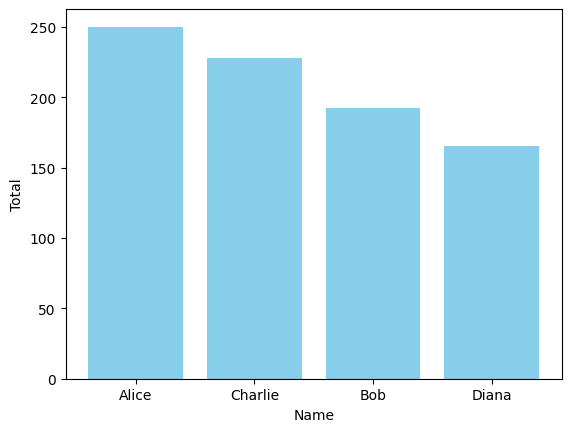

In [35]:
import matplotlib.pyplot as plt
plt.bar(df['Name'], df['Total'], color='skyblue')
plt.xlabel("Name")
plt.ylabel("Total")

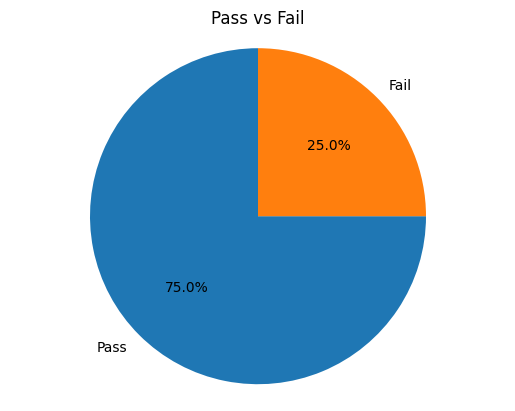

In [40]:
import matplotlib.pyplot as plt

# Count occurrences of Pass and Fail
result_counts = df["Result"].value_counts()

# Plot pie chart
plt.pie(result_counts, labels=result_counts.index, autopct='%1.1f%%', startangle=90)
plt.title("Pass vs Fail")
plt.axis('equal')  # To make the pie a circle
plt.show()
